In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [429]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Destab scenario bump

In [674]:
lx=7000
ly=100
prof_destab=pd.read_csv('f_profiles.dat', sep=' ', names=np.arange(lx), index_col=False)

#mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)
#plt.plot(mag.t, mag.M, '-')

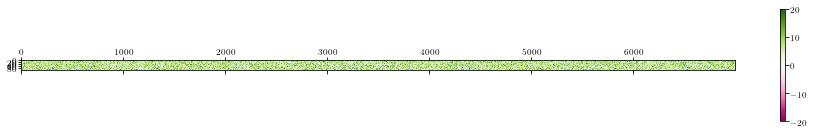

In [675]:
vmax=20
k=20
X=(prof_destab.values[k*ly:(k+1)*ly,:])
plt.matshow(X, cmap='PiYG', vmin=-vmax, vmax=vmax)
plt.colorbar()
#plt.xlim(900,1200)

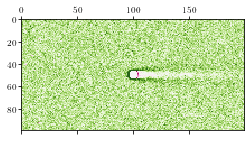

In [676]:
k=-2
plt.matshow((prof_destab.values[k*ly:(k+1)*ly,:])[:,3400:3600], cmap='PiYG', vmin=-vmax, vmax=vmax)

# Destab scenario

In [678]:
lx=700
ly=100
D=0.09
prof_destab=pd.read_csv('f_profiles_destab_revelo.dat', sep=' ', names=np.arange(lx), index_col=False)

#mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)
#plt.plot(mag.t, mag.M, '-')

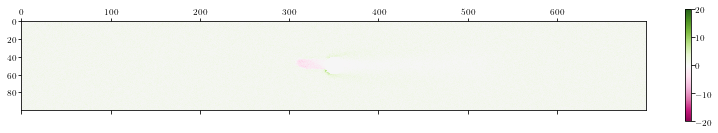

In [679]:
k=170
X=(prof_destab.values[k*ly:(k+1)*ly,:])
plt.matshow(X, cmap='PiYG', vmin=-vmax, vmax=vmax)
plt.colorbar()
#plt.xlim(900,1200)

In [680]:
plt.matshow((prof_destab[D].values[k*ly:(k+1)*ly,:])[:,300:400], cmap='PiYG', vmin=-vmax, vmax=vmax)

KeyError: 0.09

In [681]:
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.3*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

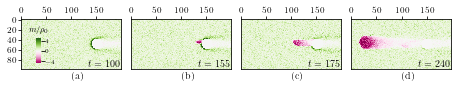

In [694]:
fig, ax = plt.subplots(1, 4)
xmin, xmax= 200,400
v0=5
xlab,ylab=0.67,0.05
x0,y0=0.5,-0.2

k=100
X=9*(prof_destab.values[k*ly:(k+1)*ly,:])/8
img=ax[0].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[0].text(s=r'$t=%d$'%k, x=xlab, y=ylab, transform=ax[0].transAxes)
ax[0].text(s=r'$\mathrm{(a)}$', x=x0, y=y0, transform=ax[0].transAxes)


k=155
X=9*(prof_destab.values[k*ly:(k+1)*ly,:])/8
ax[1].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[1].set_yticks([])
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[1].text(s=r'$t=%d$'%k, x=xlab, y=ylab, transform=ax[1].transAxes)
ax[1].text(s=r'$\mathrm{(b)}$', x=x0, y=y0, transform=ax[1].transAxes)


k=175
X=9*(prof_destab.values[k*ly:(k+1)*ly,:])/8
ax[2].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[2].set_yticks([])
ax[2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[2].text(s=r'$t=%d$'%k, x=xlab, y=ylab, transform=ax[2].transAxes)
ax[2].text(s=r'$\mathrm{(c)}$', x=x0, y=y0, transform=ax[2].transAxes)

k=240
X=9*(prof_destab.values[k*ly:(k+1)*ly,:])/8
ax[3].matshow(X[:,xmin:xmax], cmap='PiYG', vmin=-v0, vmax=v0)
ax[3].set_yticks([])
ax[3].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)
ax[3].text(s=r'$t=%d$'%k, x=xlab, y=ylab, transform=ax[3].transAxes)
ax[3].text(s=r'$\mathrm{(d)}$', x=x0, y=y0, transform=ax[3].transAxes)

plt.subplots_adjust(left=0.04,
    bottom=0.01,
    right=1,
    top=0.93,
    wspace=0.1,
    hspace=0.1,)

#cbaxes = inset_axes(ax[0], width="6%", height="50%", loc=8, )
cbaxes = inset_axes(ax[0], width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.1,0.22,.05,.5), bbox_transform=ax[0].transAxes)
cbar=plt.colorbar(img, cax=cbaxes, ticks=[-4, 0.,4], orientation='vertical')
cbar.outline.set_visible(False)


cbar.ax.set_title(r'$m/\rho_0$', rotation=0, fontsize=8)
cbar.ax.tick_params(labelsize=6)

plt.savefig('destab_revelo.pdf', dpi=400)

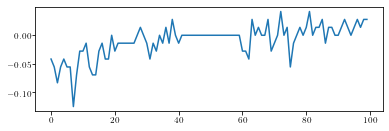

In [443]:
plt.plot(X[50,300:400])

In [324]:
k=-2
np.sum(prof_destab.values[k*ly:(k+1)*ly,:])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
plt.plot()

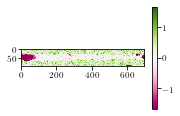

In [34]:
k=-2
plt.imshow((prof_destab_bump.values[k*ly:(k+1)*ly,:]), cmap='PiYG', vmin=-vmax, vmax=vmax)
plt.colorbar()

# Compare obstacle

In [11]:
fig_width_pt = 200  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 1.1*fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 9,
          'xtick.direction': 'out',
          'ytick.labelsize': 9,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [172]:
lx=700
ly=100
prof_destab_bump=pd.read_csv('f_profiles_bump.dat', sep=' ', names=np.arange(lx), index_col=False)

prof_destab_revelo=pd.read_csv('f_profiles_revelo.dat', sep=' ', names=np.arange(lx), index_col=False)


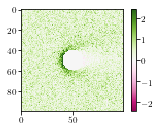

In [173]:
k=-2
plt.imshow((prof_destab_bump.values[k*ly:(k+1)*ly,:])[:,300:400], cmap='PiYG', vmin=-vmax, vmax=vmax)
plt.colorbar()

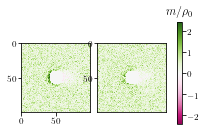

In [175]:
fig, ax = plt.subplots(1, 2)
v0=5

k=29
img=ax[0].imshow((prof_destab_bump.values[k*ly:(k+1)*ly,:])[:,300:400], cmap='PiYG', vmin=-vmax, vmax=vmax)
img=ax[1].imshow((prof_destab_revelo.values[k*ly:(k+1)*ly,:])[:,300:400], cmap='PiYG', vmin=-vmax, vmax=vmax)

ax[1].set_xticks([])
#ax[1].set_yticks(np.arange(150,241, 15), np.arange(np.int64(150/3),np.int64(241/3), 5)[::-1]);

cbar=plt.colorbar(img, ax=ax, location='right')
#plt.tight_layout(pad=0.01)
plt.subplots_adjust(left=0,
    bottom=0.01,
    right=0.73,
    top=0.93,
    wspace=0.1,
    hspace=0.1,)
cbar.ax.set_title(r'$m/\rho_{\rm 0}$', rotation=0)

plt.savefig('obstacles.pdf', dpi=400)

# Film

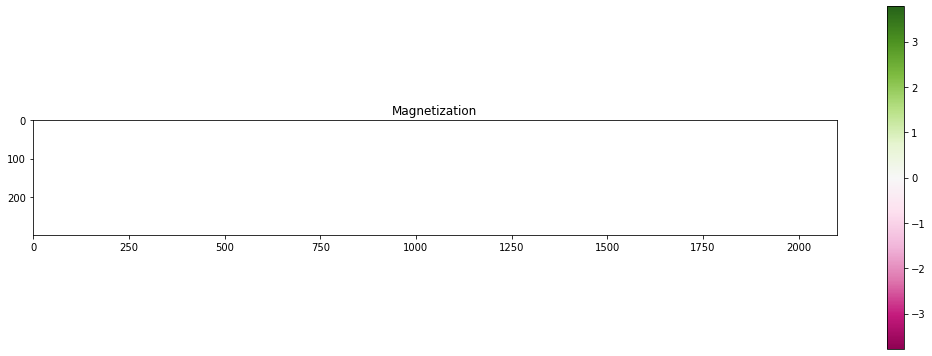

In [7]:
import matplotlib.animation as animation

frame = 0

k=-2
mp=prof_destab.values[k*ly:(k+1)*ly,:].copy()
vmax=np.abs(np.max(mp))

fig, ax = plt.subplots(1, figsize=(18,7))
im0=ax.imshow(prof_destab.values[frame*ly:(frame+1)*ly,:], cmap='PiYG', vmin=-vmax, vmax=vmax, aspect='equal')
plt.colorbar(mappable=im0, shrink=0.9, ax=ax)
ax.set_title(r'Magnetization')

#im1=ax[1].imshow(rhop, cmap='magma', vmin=0, vmax=vmax)
#plt.colorbar(mappable=im1, shrink=0.9);
#ax[1].set_title(r'Density')

def update(*args):
    global frame
    #print(frame)

    #img.set_array(prof_m[frame])
    
    im0.set_array(prof_destab.values[frame*ly:(frame+1)*ly,:])
    #im1.set_array(prof_rho[frame])

    frame+=1
    #frame %= len(prof_m)

    return im0,

ani = animation.FuncAnimation(fig, update, np.int64(prof_destab.shape[0]/300))
writer = animation.FFMpegWriter(fps=20)
ani.save('micro_obst_v1_beta2_D2_rho5_bump.avi', writer=writer) 